<a href="https://colab.research.google.com/github/88270gagan/AirBnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from shapely import wkt

In [2]:
url='https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [4]:
df.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


**Conclusion:** : This function is  giving first 5 Rows of DataFrame

In [5]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


**Conclusion** : This Function is returning a last n rows of DataFrame

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Conclusion** : This is giving descriptive summary of DataFrame

In [7]:
# Review the data types

df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Conclusion** : It is returning a Series with the data type of each column.

In [8]:
# Review the columns 

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Conclusion** : It Returns the column labels of DataFrame

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Conclusion** : This function is returning number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [10]:
df.shape

(48895, 16)

**Conclusion** : This function is returning no of rows and columnns

In [11]:
# Removing the Duplicates if any

df.duplicated().sum()
df.drop_duplicates(inplace=True)

**Conclusion** : This functions returns a dataframe with the duplicate rows removed

In [12]:
# Check for the null values in each column

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Conclusion** : This function is giving series of column names along with the sum of missing values in each column.

In [13]:
# Remove the NaN values from the dataset

df.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
df.reviews_per_month.isnull().sum()

0

In [14]:
df.drop(['host_id'], axis = 1, inplace=True)

In [15]:
df.columns

Index(['id', 'name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

**Conclusion** : Hence, after applying drop function we acknowleged that host_id has been dropped

In [16]:
#Replacing all NaN values in “review_per_month_ with 0

df.reviews_per_month.fillna(0, inplace=True)

print(df.isnull().any())

id                                False
name                               True
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool


**Conclusion** : The fillna() method returns a new DataFrame object unless the inplace parameter is set to True, in that case the fillna() method does the replacing in the original DataFrame instead.

Index(['id', 'name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

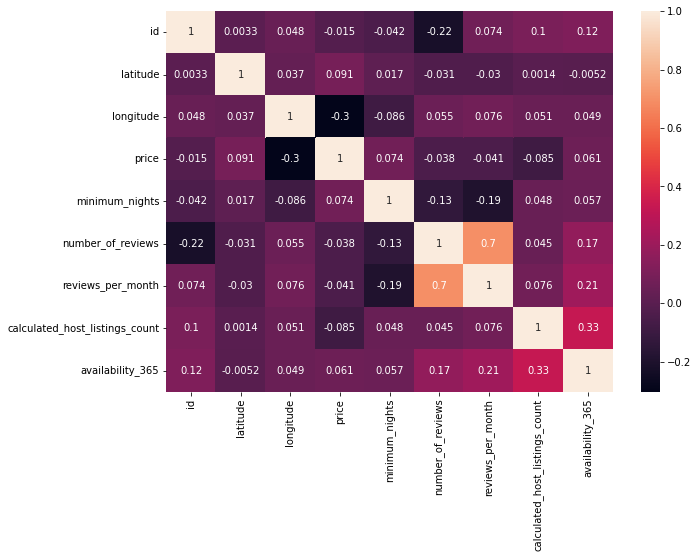

In [17]:
#Correlation between different variables

corr = df.corr(method='kendall')
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)
df.columns

**Conclusion** : This is a graphical representation of 2D (two dimensional) data. Each data value represents in a matrix and it has a special color. The color of the matrix is dependent on value. Normally, low-value show in low-intensity color and high-value show in hight-intensity color format.

In [18]:
# Data Visualisation 

import seaborn as sns

In [19]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

**Conclusion** : This function is giving unique value that is present in the coulmn

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'neighbourhood Group')

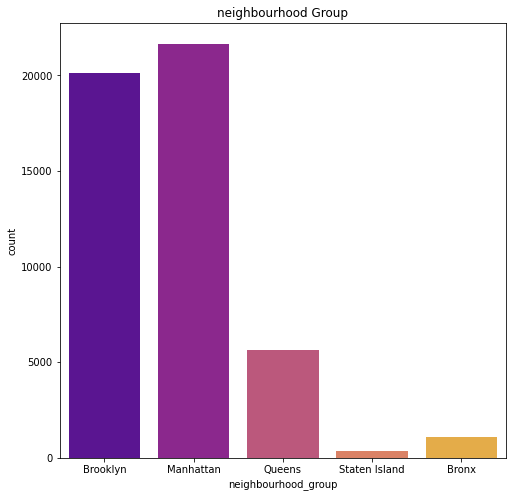

In [20]:
#plotting all neighbourhood group

sns.countplot(df['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title('neighbourhood Group')

**Conclusion** :  From the above Diagram we got that Manhattan and Brooklyn has more number of listing that the Queens,Bronx and Staten island.

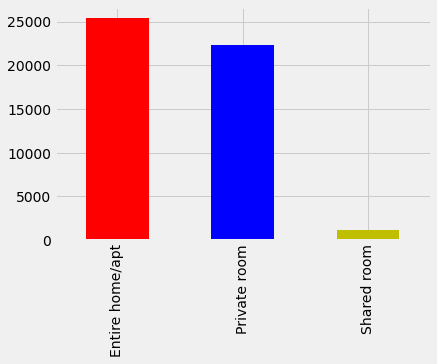

In [30]:
# Room Types and Neighbourhood Group

df['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])
plt.show()

**Conclusion** : From the above data we get that  the Apartment and Private data is more than that of shared rooms. In general, Shared rooms costs less and can be very useful for travellers who moves from one city to another city quite frequently. Though the shared rooms data is less.

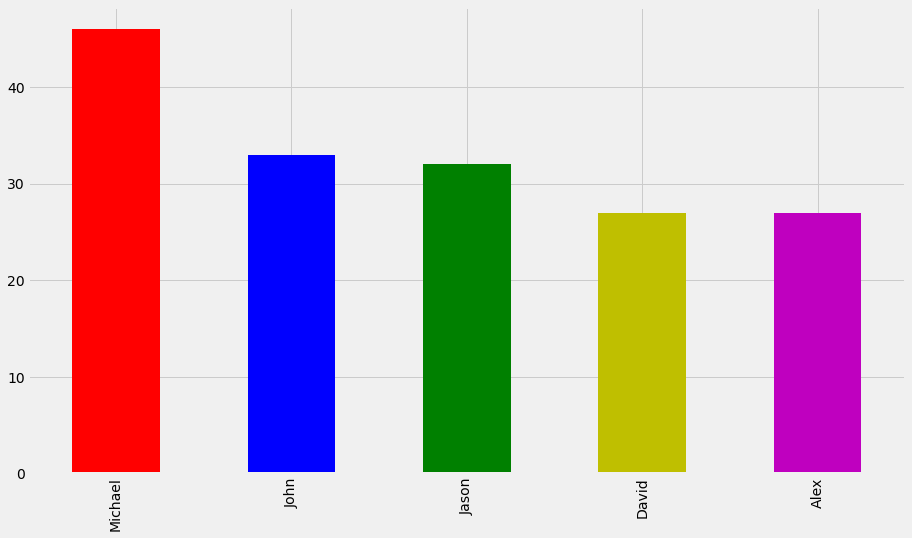

In [35]:
# Checking who has received the more reviews
plt.figure(figsize=(14,8))
review_50.head(2)
df1 = review_50['host_name'].value_counts()[:5].plot(kind='bar',color=['r','b','g','y','m'])
#sns.barplot(x=df1.index,y=df1.values)

**Conclusion** : Above plot shows the Top 5 host and   Michael has received more reviews.

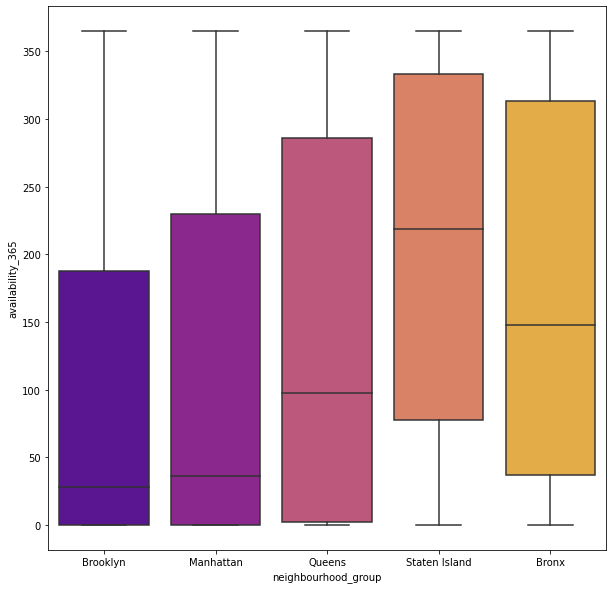

In [21]:
#Relation between neighbour group and Availability of Room

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='plasma')

**Conclusion** : This  graph above shows the relationship between the availability room and neighbour group.

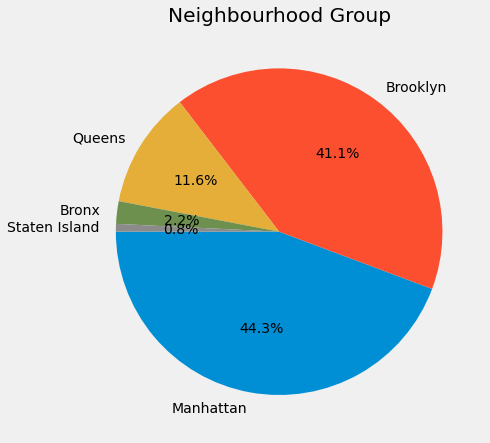

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

**Conclusion** : This pie chart shows that Airbnb Listings in Newyork are near Manhattan, and Brooklyn has the highest share of hotels.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


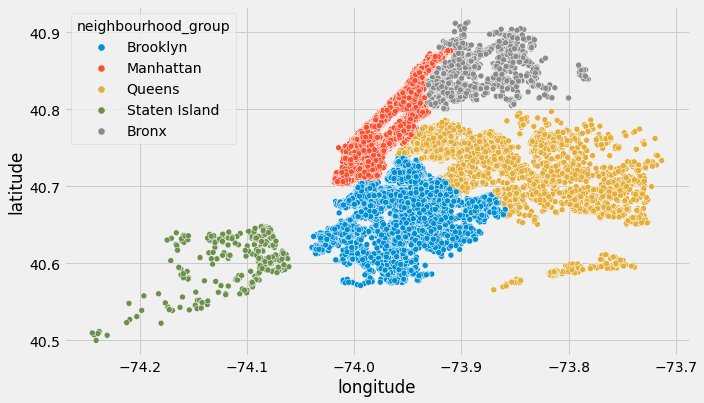

In [23]:
# Map of Neighbourhood group

plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()


**Conclusion** : This Map is showing Broklyn in Blue colour Manhattan in Orange colour Queens in Yellow Colour State Island in Green Colour Bronyx in Red Colour 